### Carga de la librería pandas y matplotlib

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

### Carga del fichero excel saltando las 7 primeras filas y cargando un total de 53 filas

In [90]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df = pd.read_excel("3989.xlsx",header=7,nrows=53, engine="openpyxl")

In [55]:
df.head()

,,2020T1,2019T4,2019T3,2019T2,2019T1,2018T4,2018T3,2018T2,2018T1,...,2004T2.4,2004T1.4,2003T4.4,2003T3.4,2003T2.4,2003T1.4,2002T4.4,2002T3.4,2002T2.4,2002T1.4
0,Total Nacional,22994.2,23158.8,23088.7,23035.5,22825.4,22868.8,22854.0,22834.2,22670.3,...,2072.0,2044.0,2022.3,1990.0,1965.4,1927.9,1901.9,1871.0,1861.7,1838.6
1,02 Albacete,184.4,180.9,182.6,182.1,186.5,192.1,192.9,196.1,191.7,...,15.0,17.0,14.3,14.9,15.7,14.9,13.0,13.3,13.1,11.9
2,03 Alicante/Alacant,895.1,934.1,920.3,917.8,876.8,883.8,903.4,886.4,893.4,...,74.3,71.1,74.5,75.4,68.1,71.0,71.5,69.2,70.5,64.3
3,04 Almería,354.4,352.1,334.3,337.3,340.7,339.4,336.2,332.0,349.1,...,21.7,23.3,23.2,22.9,20.8,21.4,24.2,27.0,23.6,22.3
4,01 Araba/Álava,151.2,154.1,156.1,158.9,161.4,157.6,156.2,155.6,155.1,...,15.8,16.5,16.2,16.0,16.0,14.8,15.1,13.4,14.5,14.0


### Filtrado de columnas en un nuevo dataFrame

In [91]:
df2 = df[['2020T1', '2019T1']]

In [92]:
df2.head()

,2020T1,2019T1
0,22994.2,22825.4
1,184.4,186.5
2,895.1,876.8
3,354.4,340.7
4,151.2,161.4


### Filtrado de filas - Eliminamos la primera seleccionando el resto

In [93]:
df3 = df2.iloc[1:53]
df3.head()

,2020T1,2019T1
1,184.4,186.5
2,895.1,876.8
3,354.4,340.7
4,151.2,161.4
5,452.7,453.5


### Creamos columna acumulada

In [94]:
dfaux = df3.iloc[:, 0 ].cumsum().to_frame()
dfaux = dfaux.rename(columns = {"2020T1":'2020T1ACUM'})
dfaux2 = df3.iloc[:, 1 ].cumsum().to_frame()
dfaux2 = dfaux2.rename(columns = {"2019T1":'2019T1ACUM'})
df3 = pd.concat([dfaux,dfaux2,df3], axis=1)

In [89]:
df3.head(10)

,2020T1ACUM,2019T1ACUM,2020T1,2019T1
1,184.4,186.5,184.4,186.5
2,1079.5,1063.3,895.1,876.8
3,1433.9,1404.0,354.4,340.7
4,1585.1,1565.4,151.2,161.4
5,2037.8,2018.9,452.7,453.5
6,2110.3,2087.3,72.5,68.4
7,2422.4,2407.8,312.1,320.5
8,3037.4,3030.1,615.0,622.3
9,5897.1,5878.6,2859.7,2848.5
10,6432.0,6416.9,534.9,538.3


<Axes: >

<Figure size 640x480 with 0 Axes>

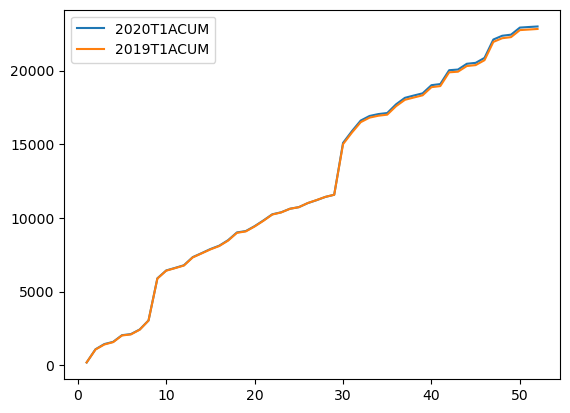

In [97]:
plt.figure()
df3[['2020T1ACUM','2019T1ACUM']].plot()